## Import the required Libraries and Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
column=["sepal_length","sepal_width","petal_length","petal_width","species"] #prepare the datsets
df=pd.read_csv('iris.data', names=column)

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
print(df.describe()) #describe the datasets

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


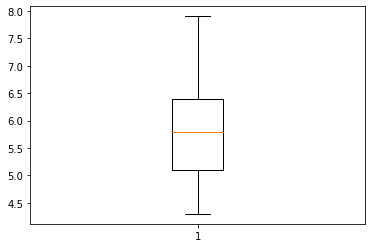

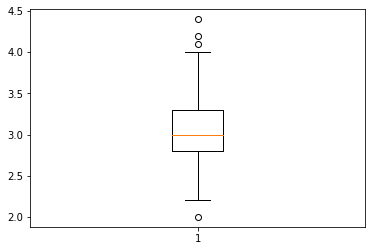

In [5]:
plt.figure(1)
plt.boxplot([df['sepal_length']])
plt.figure(2)
plt.boxplot([df['sepal_width']]) #boxplot visualization of sepal length and sepal width
plt.show()


array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

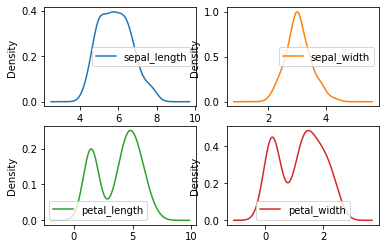

In [6]:
df.plot(kind ='density',subplots = True, layout =(2,2),sharex = False) #see the density plot for relation b/w each column and their occurence

In [7]:
print("Target Labels", df["species"].unique())

Target Labels ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


# Predict the Model

In [8]:
from sklearn.model_selection import train_test_split #split the dataset into train and test data
train, test = train_test_split(df, test_size = 0.25)

In [9]:
train_X = train[["sepal_length","sepal_width","petal_length","petal_width"]]
train_y = train.species

test_X = test[["sepal_length","sepal_width","petal_length","petal_width"]]
test_y = test.species

In [10]:
test_y.head()

65     Iris-versicolor
75     Iris-versicolor
116     Iris-virginica
26         Iris-setosa
89     Iris-versicolor
Name: species, dtype: object

In [11]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier #we are importing following models to see their accuracy

In [18]:
#Using LogisticRegression
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
score1=metrics.accuracy_score(test_y,prediction)
print('Accuracy:',score1)

Accuracy: 0.9736842105263158


In [19]:
from sklearn.svm import SVC
model1 = SVC()
model1.fit(train_X,train_y)

pred_y = model1.predict(test_X)
score2=metrics.accuracy_score(test_y,pred_y)
print("Acc=",score2)

Acc= 0.9736842105263158


In [20]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=10)
model2.fit(train_X,train_y)
y_pred2 = model2.predict(test_X)
score3=metrics.accuracy_score(test_y,y_pred2)
print("Accuracy Score:",score3)

Accuracy Score: 0.9736842105263158


In [21]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(train_X,train_y)
y_pred4 = model4.predict(test_X)
score4=metrics.accuracy_score(test_y,y_pred4)
print("Accuracy Score:",score4)

Accuracy Score: 0.9736842105263158


In [22]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines','KNN' ,'Decision Tree'],
    'Score': [score1, score2, score3, score4]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.973684,Logistic Regression
0.973684,Support Vector Machines
0.973684,KNN
0.973684,Decision Tree
